# Finding Investment Opportunities - Optimizing Advertisement Campaigns

In this project, we'll aim to find the two best markets for advertising e-commerce programming courses that specialize in web and mobile development.

We'll be looking at existing data about new coders and what markets they are interested in. So we can reasonalby predict the best market to advertise in. In order to do this effectively we will need to understand:
* The locations of new coders
* The locations with the greatest number of new coders
* How much money new coders are willing to spend

## Summary of Results
After analyzing the data, we concluded that the best target market for advertising e-commerce programming education is the USA. The second best market is a toss up between India and Canada 

For all the details, please continue reading.

# Exploring Existing Datasets - FreeCodeCamps's 2017 New Coder Survey

Under certain circumstances it would be necessary to organize surveys to collect the necessary data. However, it's cost-effective and quicker to use existing data if it's relevant and trustworthy. 

After searching, we found our prospect. A dataset from [FreeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). You can click the link to learn more about our data curator.

Conveniently, FreeCodeCamp made this dataset publicly availble on [github](https://github.com/freeCodeCamp/2017-new-coder-survey). Below we will explore what's inside by loading in the raw clean data from the repository located [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv)

In [1]:
# Read data
import pandas as pd
raw_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
data = pd.read_csv(raw_link, low_memory = False) # low_memory = False to silence dtypes warning

# Examine Data
print(data.shape)
pd.options.display.max_columns = None
data.head()


(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Out of the 136 Columns the ones that I am interested in are:
- Age, 
- BootCamp, 
- BootcampLoanYesNo, 
- CodeEvents(All),
- CommuteTime(Radio Advertising?),
- CountryLive,
- EmploymentStatus,
- HoursLearning,
- Income,
- JobRoleInterest,
- JobApplyWhen (For structuring length of courses?),
- MoneyForLearning, 
- MonthsProgramming,
- Podcast(All),
- Resource(All),
- YouTube*


# Verifying the Sample 
In order to continue an analysis we need to check that our sample can answer our questions about a population of new coders interested in online programming courses being offered.

Specifically, we want to verify this sample can answer questions about new coders interested in web and mobile development, then we can look to understand the following variables:

* The locations of new coders
* The locations with the greatest number of new coders
* How much money new coders are willing to spend

From our brief examination above, we found the ```JobRoleInterest``` column which shows each participants job role(s) interest. Lets use this column to check for web and mobile development representivity and see all the other types of jobs the survey respondents are interested in.

In [2]:
# Generate frequency distribution for JobRoleInterest 
data['JobRoleInterest'].value_counts(normalize=True)*100 # Returns percentage

Full-Stack Web Developer                                                                                                                                                                                                     11.770595
  Front-End Web Developer                                                                                                                                                                                                     6.435927
  Data Scientist                                                                                                                                                                                                              2.173913
Back-End Web Developer                                                                                                                                                                                                        2.030892
  Mobile Developer                                                          

At first glance we can see:

* There's a majority of people interested in web development. Full-Stack Web Dev, Front-End Web Dev, Back-End Web Dev. Roughly (20%) 
* Not many people are interested in Mobile Developer ~ (1.7%)

Upon closer inspection we can see that many respondents are interested in more than one job role. And as a result the frequency distribution isn't showing us categories grouped together. 

It will be interesting to see our table evenly distributed among the categories. Let's redistribute the data so each category represents a single Job Role.

## Finding The Most Interesting Jobs

In order to redistribute the grouped interests by job roles we will need to :

* Drop all NA values if there is any
* Split grouped interests by ','
* Remove all NonAlphaNumeric characters    
* Count the frequency of unique interests
* Generate a new frequency plot showing the frequency of each categorical job role.

In [3]:
# Drop all NA values if there is any
if data['JobRoleInterest'].isnull().any():
    nonull_interests = data['JobRoleInterest'].dropna()
else:
    nonull_interests = data['JobRoleInterest']


# Split grouped interests by comma
split_interests = []
for interests in nonull_interests:
    interests_list = interests.split(',')
    for interest in interests_list:
            split_interests.append(interest)


print(len(nonull_interests))
print(len(split_interests))

6992
22600


After splitting the grouped interests and appending them to a new list, we can take a length count and see that we now have a list that is now over 3 times longer than our original. This indicates that many respondants are interested in more than one job role. 

Lets take a look at the top Jobs the majority of new coders are interested in.  

*(Some interests separated by '/' and 'or' could further be appended adding a few extra interests to the length of unique interests, but are negligle for our purposes.)

In [4]:
# Remove All Non-AlphaNumeric Characters
import re

cleaned_interests = []
for i in split_interests:
    clean_interest = re.sub("[^0-9a-zA-Z']+", ' ', i).rstrip()
    cleaned_interests.append(clean_interest.lstrip(' '))

In [5]:
# Count the frequencys of unique interests
interest_frequency = dict()

for interest in cleaned_interests:
    if interest in interest_frequency:
        interest_frequency[interest] += 1
    else:
        interest_frequency[interest] = 1

# Sort the Job interests from highest Frequency to Lowest
sorted_unique_interests = sorted(interest_frequency.items(), key=lambda x: x[1], reverse=True)

# Print the head
sorted_unique_interests[:15]

[('Full Stack Web Developer', 4198),
 ('Front End Web Developer', 3533),
 ('Back End Web Developer', 2772),
 ('Mobile Developer', 2304),
 ('Data Scientist', 1643),
 ('Game Developer', 1628),
 ('User Experience Designer', 1469),
 ('Information Security', 1326),
 ('Data Engineer', 1248),
 ('DevOps SysAdmin', 927),
 ('Product Manager', 814),
 ('Quality Assurance Engineer', 498),
 ('Software Engineer', 11),
 ('Software Developer', 6),
 ('Software engineer', 4)]

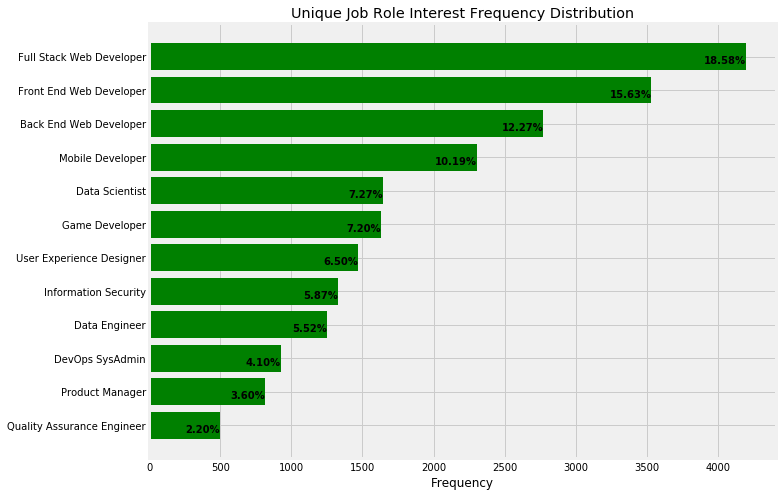

In [74]:
# Graph for the frequency table above
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Separate list of Tuples 
x,y = zip(*sorted_unique_interests)
total = sum(y) # Used for percentage

# Configure plot
fig, ax = plt.subplots()

# Reassign variables for readability and Select top Values
job_role = x[:12]
frequency = y[:12]

# Configure y axis for Job Role Labeling
y_pos = range(len(job_role))
ax.set_yticks(y_pos)
ax.set_yticklabels(job_role)
ax.invert_yaxis()  # labels read top-to-bottom
ax.tick_params(right=0, left=0, top=0, bottom=0) # Remove ticks
    
# Add percentage text on respective bars
for i, v in enumerate(frequency):
    ax.text(v, 
            i + .2, 
            '{:1.2f}{}'.format((v/total)*100,'%'), 
            color='black', 
            ha='right', 
            picker=4,
            fontweight='bold')

# Assign Labels for plot
ax.set_xlabel('Frequency')
ax.set_title('Unique Job Role Interest Frequency Distribution')

# Plot Horizontal Bars
ax.barh(y_pos, frequency, align='center',
        color='green', ecolor='black')

plt.show()


It appears roughly 46% of the respondents are interested in some type of web development. While only 10% are interested in mobilbe development.

Since the focus of this e-commerce site is on web and mobile development, they will be able to attract over 50% of the overall market share. This is positive and confirms our sample set is representative of the population of interest.

## Finding the best country to market in 
Now that we know what types of jobs people are interested in we can zoom out and take a look at where these people live to start targeting our market locations.

We'll be looking at the ```CountryLive``` column from our dataset to determine where the majority our new coders live. This way any ads we run can reach the greatest number of people.

In [76]:
# Isolate the participants that answered what role they'd be interested in
data_good = data[data['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_freq = data_good['CountryLive'].value_counts()
relative_freq = data_good['CountryLive'].value_counts(normalize = True) * 100

In [77]:
# relative_freq = data['CountryLive'].value_counts(normalize=True)*100
# absolute_freq = data['CountryLive'].value_counts()

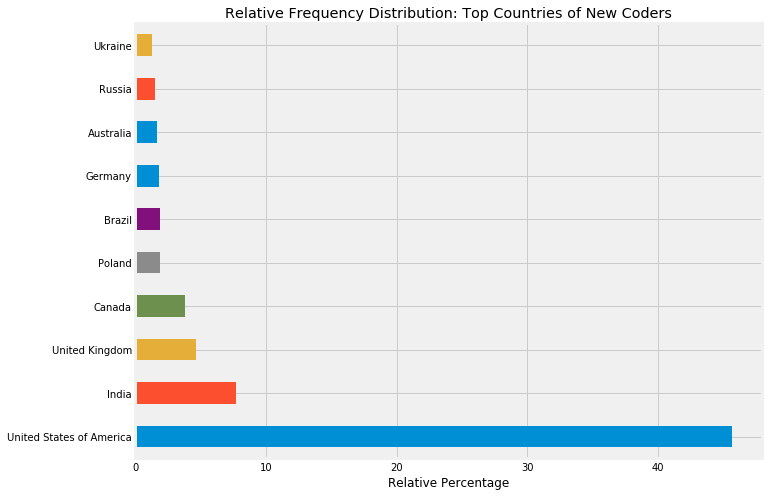

In [78]:
title = ("Relative Frequency Distribution: Top Countries of New Coders")
plt.xlabel('Relative Percentage')
relative_freq[:10].plot.barh(title=title)
plt.show()


We can quickly observe that the United States of America and India hold the highest amount of budding programmers. With the USA accounting for 37.76% of total respondants and India 9.12%.

We could stop here and market to these two countries, but we should dig deeper for a better analysis, especically because we have all this data for making a well-informed analysis.

# Digging Deeper: Filtering Out The Freeloaders

As we go deeper in our analysis, we'll narrow down our market to the top 4 countries: US, India, the United Kingdom, and Canada. These countries held significant respondents and they all speak English.

Going forward we will identify the amount of money these people have to spend so we can avoid targeting markets saturated with free learners and/or people who can't afford our courses.

## The Approach

The ```MoneyForLearning``` column describes how much money respondents have spent since they started learning coding. The e-commerce site will be selling monthly subscriptions at a price of $59 per month, so well want to determine how much money each new coder spends per month. We'll use the ```MonthsProgramming``` column to determine this number. 


In [79]:
# Find per month spending and replace 0 values with 1 in MonthsProgramming column to avoid div/0
data_good['MonthsProgramming'].replace(0,1, inplace=True)
data_good['MoneySpentPerMonth'] = data_good['MoneyForLearning']/data_good['MonthsProgramming']

In [80]:
# Number of Nan values in new column counting total length - total Non-NaN values
nancount = len(data_good['MoneySpentPerMonth']) - data_good['MoneySpentPerMonth'].count()
nancount

675

In [81]:
# Drop NaN values in Moneyspentpermonth
data_good = data_good[data_good['MoneySpentPerMonth'].notnull()]

# Remove the rows with null values in 'CountryLive'
data_good = data_good[data_good['CountryLive'].notnull()]

# Check to see that we still have enough data 
data_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

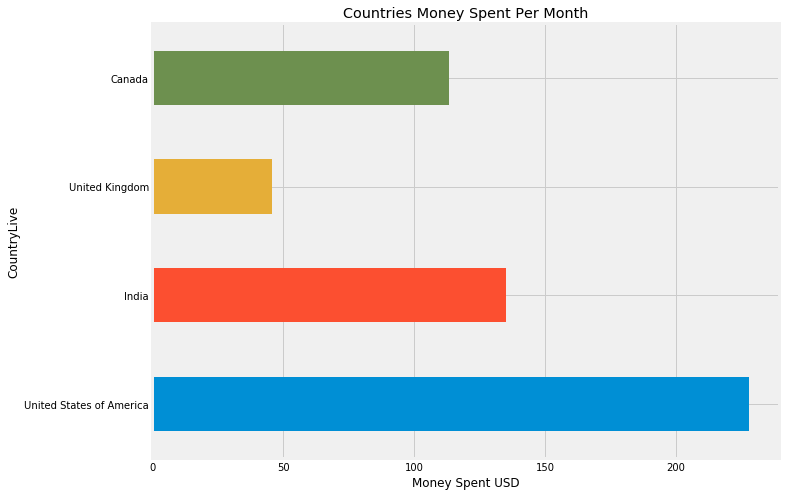

In [82]:
# Group the columns by country and compute the mean
countries_mean = data_good.groupby('CountryLive').mean()

# Select the top 4 countries and show the average money spent per month
plt.xlabel('Money Spent USD')
title = ('Countries Money Spent Per Month')
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']].plot.barh(title=title)
plt.show()

From the above frequency plot we can see that the USA spends the most money per month. It's odd seeing the UK spending the lowest amount considering their GDP is slightly higher than Indias.

# Checking For Extremes
Since the data seems a little odd, we are going to make a box plot of each countries distributions to see if their are any extreme outliers distorting our means.

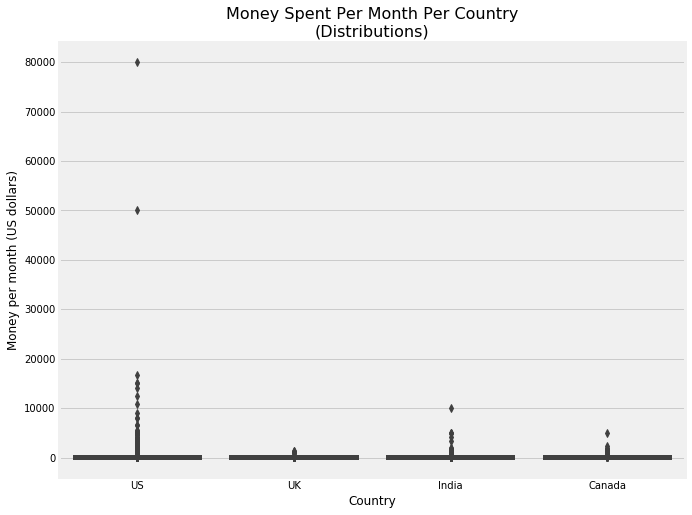

In [83]:
# Isolate only the countries of interest
top_4 = data_good[data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see the US has an extreme of $50,000 and $80,000 spent per month. This isn't impossible, but it's highly unlikely someone is spending that much so we will remove these outliers and recompute the mean.

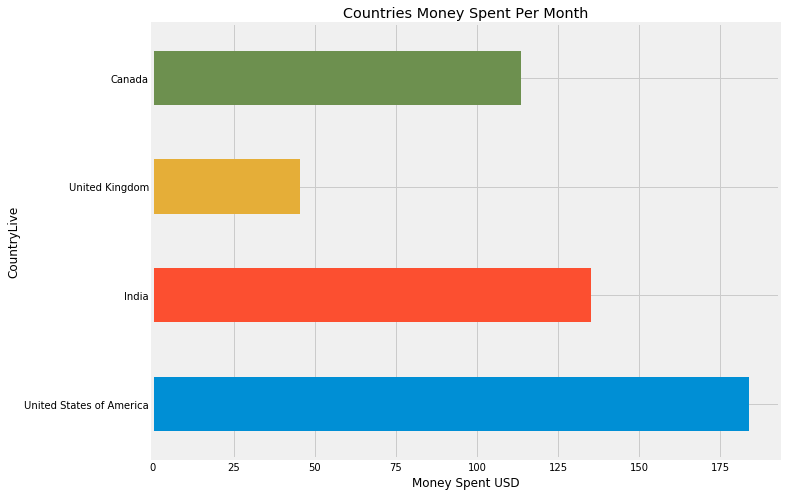

In [84]:
# Remove any outliers greater than 40000
data_good = data_good[data_good['MoneySpentPerMonth'] < 40000]

# Recompute the mean
countries_mean = data_good.groupby('CountryLive').mean()

# Select the top 4 countries and show the average money spent per month
plt.xlabel('Money Spent USD')
title = ('Countries Money Spent Per Month')
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']].plot.barh(title=title)
plt.show()



At this point it's pretty clear that one of the countries to advertise in would be the US. But what would the second best country?

India and Canada are pretty close to each other in terms of  the amounts of money being spent by new coders. Let's see if we can identify key differences between the countries that will help us make a better decision.

When we computed the average money spent per month we looked at all the respondents. However, because we are mainly building programs around web and mobile development it might prove worthy to computer averages with only these new coders in mind.

# Finding the Average Amount of Money Spent Per Month: Looking at Web and Mobile Developers

In [85]:
# First we'll filter out all other new coders so were only looking at web and mobile
mobile_web = data_good[data_good['JobRoleInterest'].str.contains(
    'Web|Mobile')]
# Then we'll filter by our top 4 countries
mobile_web_top_4 = mobile_web[mobile_web['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Check to see that we still have enough data points
mobile_web['CountryLive'].value_counts().head()


United States of America    2515
India                        393
United Kingdom               247
Canada                       203
Poland                       114
Name: CountryLive, dtype: int64

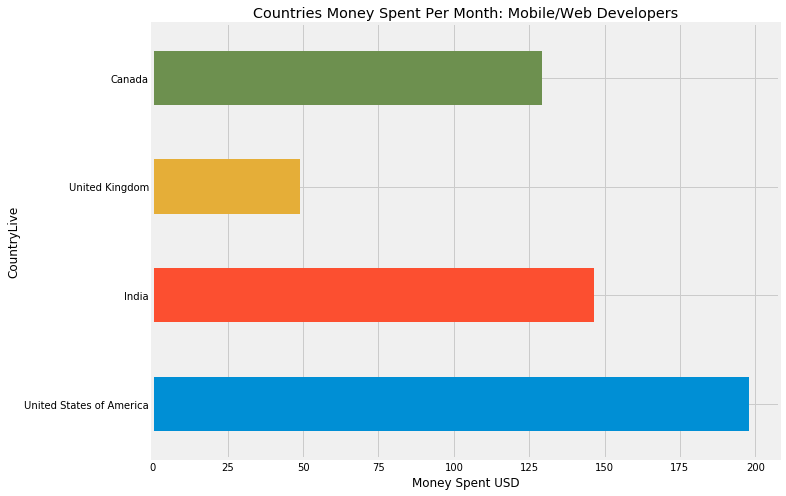

In [86]:
# Group the columns by country and compute the mean
countries_mean = mobile_web.groupby('CountryLive').mean()

# Select the top 4 countries and show the average money spent per month
plt.xlabel('Money Spent USD')
title = ('Countries Money Spent Per Month: Mobile/Web Developers')
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']].plot.barh(title=title)
plt.show()

The type of job role interest doesn't seem to have too much of an effect on the amount of money new coders are willing to spend per month. This may be because a majority of respondents were interested in more than one job role. Or it may also be possible that the job role doesn't change how much money new coders are willing to spend.

In order to decide on a second country we can contiue analyzing the data or we can let the marketing department decide.

One metric that comes to mind is how much time per month respondents spend studying. Because our e-commerce site is based off a monthly subscription it would be ideal to market to the group of new coders that have the least amount of time to learn. This way they will be learning longer and therefore subscribed longer.

In [87]:
data_good['HoursLearning'].describe()

count    6015.000000
mean       17.105071
std        15.028925
min         0.000000
25%         6.000000
50%        12.000000
75%        20.500000
max       168.000000
Name: HoursLearning, dtype: float64

We can see that the max hours learning is 168. This equates to one week. This is good to know because there was no documentation on the description for this column. We now know that ```HoursLearning``` describes the amount of hours a respondent spends learning each week.

Let's look at this metric grouped by country so we can decide between India or Canada

## Hours Learning by Country

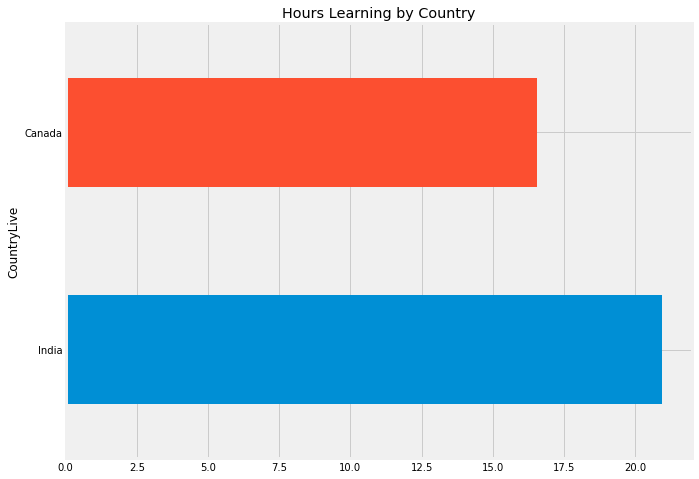

In [88]:
title='Hours Learning by Country'
countries_mean['HoursLearning'][[
                            'India',
                            'Canada']].plot.barh(title=title)
plt.show()

Looks like Canada has a lower average for learning each week. This difference isn't much, but could possibly mean one extra month of subscription for learning. Either Way this data will be useful.

# Conclusion
In this analysis we used a survey from freecodecamp to analyze the best two markets to advertise in for an e-commerce company that specializes in web and mobile development.

We found that the majority of new coders were interested in web and mobile development.

We delineated market territory by the countries the respondents lived in and found the top 4 countries: USA, India, Canada and the UK.

Betweeen these 4 countries, the USA was an obvious choise for a marketing campaign. Discerning between India and Canada proved to be a bit more difficult as we have conflicting evidence supporting both countries. We can split our marketing costs between these 3 countries, focus only on the USA or some other mix. We feel it's best that the marketing team use their domain knowledge and decide.